In [1]:
import pandas as pd
import re
from statistics import mean
from collections import Counter
from utils import TYPES
# TYPES=['[I]ntro/[E]xtra-vert', 'I[n]tuition/[S]ensing', '[T]hink/Feel', '[J]udge/[P]erceive']
DOMAIN_PATTERN='^(?:https?:\/\/)?(?:[^@\/\n]+@)?(?:www\.)?([^:\/\n]+)'
URL_PATTERN='http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

In [2]:
data = pd.read_csv("mbti_data.csv")
data['posts']= data['posts'].apply(lambda x : x[1:-1])
data.head()

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...
1,ENTP,I'm finding the lack of me in these posts very...
2,INTP,Good one _____ https://www.youtube.com/watc...
3,INTJ,"Dear INTP, I enjoyed our conversation the ot..."
4,ENTJ,You're fired.|||That's another silly misconcep...


In [3]:
len(data['posts'][0].split("|||"))
lens = [len(data['posts'][i].split(r"|||")) for i in range(len(data))]
cnt = Counter(lens)
print(mean(lens))
print(cnt)

48.74495626822157
Counter({50: 7500, 47: 80, 48: 78, 42: 60, 49: 59, 46: 54, 44: 52, 39: 39, 40: 37, 45: 35, 37: 35, 41: 34, 38: 33, 35: 32, 43: 28, 36: 26, 32: 26, 33: 20, 25: 20, 27: 19, 30: 18, 28: 17, 31: 17, 26: 17, 23: 16, 24: 16, 34: 15, 29: 13, 21: 10, 58: 9, 18: 9, 22: 9, 69: 8, 16: 7, 56: 6, 15: 6, 57: 6, 19: 6, 9: 6, 71: 6, 59: 5, 66: 5, 20: 5, 70: 5, 52: 5, 12: 4, 53: 4, 10: 4, 72: 4, 60: 4, 67: 4, 8: 3, 64: 3, 13: 3, 63: 2, 62: 2, 51: 2, 7: 2, 80: 2, 68: 2, 61: 2, 11: 2, 4: 2, 54: 2, 14: 1, 1: 1, 79: 1, 75: 1, 83: 1, 17: 1, 2: 1, 78: 1, 77: 1, 89: 1, 5: 1, 73: 1, 74: 1})


In [4]:
data['no_posts'] = data['posts'].apply(lambda x: len(x.split(r"|||")))
data = data[ data['no_posts'] <= 50]
data = data[ data['no_posts'] >= 30]

<AxesSubplot:>

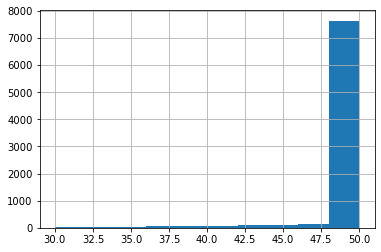

In [5]:
data['no_posts'].hist()

In [6]:
data['type'].value_counts().sort_index()

ENFJ     180
ENFP     640
ENTJ     218
ENTP     654
ESFJ      40
ESFP      42
ESTJ      37
ESTP      84
INFJ    1420
INFP    1761
INTJ    1036
INTP    1241
ISFJ     159
ISFP     254
ISTJ     191
ISTP     321
Name: type, dtype: int64

In [7]:
split_df = data['type'].str.split('',expand=True).drop([0, 5], axis=1)
split_df.columns = TYPES
split_df.head()

,[I]ntro/[E]xtra-vert,I[n]tuition/[S]ensing,[T]hink/[F]eel,[J]udge/[P]erceive
0,I,N,F,J
1,E,N,T,P
2,I,N,T,P
3,I,N,T,J
4,E,N,T,J


In [8]:
data = pd.concat([split_df, data], axis=1)

In [9]:
data.reset_index(inplace=True)
data.rename(columns = {'index':'user_id'}, inplace = True)

In [10]:
data.head()

,user_id,[I]ntro/[E]xtra-vert,I[n]tuition/[S]ensing,[T]hink/[F]eel,[J]udge/[P]erceive,type,posts,no_posts
0,0,I,N,F,J,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...,50
1,1,E,N,T,P,ENTP,I'm finding the lack of me in these posts very...,50
2,2,I,N,T,P,INTP,Good one _____ https://www.youtube.com/watc...,50
3,3,I,N,T,J,INTJ,"Dear INTP, I enjoyed our conversation the ot...",50
4,4,E,N,T,J,ENTJ,You're fired.|||That's another silly misconcep...,50


In [11]:
for type_ in TYPES:
    print(data[type_].value_counts())

I    6383
E    1895
Name: [I]ntro/[E]xtra-vert, dtype: int64
N    7150
S    1128
Name: I[n]tuition/[S]ensing, dtype: int64
F    4496
T    3782
Name: [T]hink/[F]eel, dtype: int64
P    4997
J    3281
Name: [J]udge/[P]erceive, dtype: int64


In [12]:
data.head()

,user_id,[I]ntro/[E]xtra-vert,I[n]tuition/[S]ensing,[T]hink/[F]eel,[J]udge/[P]erceive,type,posts,no_posts
0,0,I,N,F,J,INFJ,http://www.youtube.com/watch?v=qsXHcwe3krw|||h...,50
1,1,E,N,T,P,ENTP,I'm finding the lack of me in these posts very...,50
2,2,I,N,T,P,INTP,Good one _____ https://www.youtube.com/watc...,50
3,3,I,N,T,J,INTJ,"Dear INTP, I enjoyed our conversation the ot...",50
4,4,E,N,T,J,ENTJ,You're fired.|||That's another silly misconcep...,50


In [13]:
data_split = data.set_index(['user_id',*TYPES,'type','no_posts']).apply(lambda x: x.str.split(r'\|\|\|').explode()).reset_index()

In [14]:
data_split

,user_id,[I]ntro/[E]xtra-vert,I[n]tuition/[S]ensing,[T]hink/[F]eel,[J]udge/[P]erceive,type,no_posts,posts
0,0,I,N,F,J,INFJ,50,http://www.youtube.com/watch?v=qsXHcwe3krw
1,0,I,N,F,J,INFJ,50,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...
2,0,I,N,F,J,INFJ,50,enfp and intj moments https://www.youtube.com...
3,0,I,N,F,J,INFJ,50,What has been the most life-changing experienc...
4,0,I,N,F,J,INFJ,50,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...
...,...,...,...,...,...,...,...,...
407530,8574,I,N,F,P,INFP,50,I was going to close my facebook a few months ...
407531,8574,I,N,F,P,INFP,50,30 Seconds to Mars - All of my collections. It...
407532,8574,I,N,F,P,INFP,50,"I have seen it, and i agree. I did actually th..."
407533,8574,I,N,F,P,INFP,50,Ok so i have just watched Underworld 4 (Awaken...


In [15]:
for type_ in TYPES:
    print(data_split[type_].value_counts())

I    314353
E     93182
Name: [I]ntro/[E]xtra-vert, dtype: int64
N    352057
S     55478
Name: I[n]tuition/[S]ensing, dtype: int64
F    221487
T    186048
Name: [T]hink/[F]eel, dtype: int64
P    246141
J    161394
Name: [J]udge/[P]erceive, dtype: int64


## Text preprocessing

In [16]:
def text_preprocessing(text):
    # Remove unhandled unicode chars (#1231)
    text = re.sub(r"( #\d*;)",
              lambda m: html.unescape('&' +m.group(1)[1:]),
              text.rstrip())

    # Replace '&amp;' with '&'
    text = re.sub(r'&amp;', '&', text)



    # Remove trailing whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    text = " ".join(text.split())
    text = re.sub(URL_PATTERN,"<URL>", text)
    
    return text

In [17]:
data_split['posts'] = data_split['posts'].apply(lambda x: text_preprocessing(x))

In [18]:
data_split.drop(["no_posts"],axis=1).to_csv("mbti_processed.csv", index=False)

In [19]:
data_split = pd.read_csv("mbti_processed.csv")

In [20]:
data_split.head()

,user_id,[I]ntro/[E]xtra-vert,I[n]tuition/[S]ensing,[T]hink/[F]eel,[J]udge/[P]erceive,type,posts
0,0,I,N,F,J,INFJ,<URL>
1,0,I,N,F,J,INFJ,<URL>
2,0,I,N,F,J,INFJ,enfp and intj moments <URL> sportscenter not t...
3,0,I,N,F,J,INFJ,What has been the most life-changing experienc...
4,0,I,N,F,J,INFJ,<URL> <URL> On repeat for most of today.
